## Predicting Heart Disease

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.

We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future. The dataset has the following features:

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
                                               
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

Before we jump into building a model, let's conduct exploratory data analysis on the dataset.

Please note: For each s

## 1. Importing the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns

## 2. Reading the data into pandas Dataframe

In [2]:
heart_disease = pd.read_csv('heart_disease_prediction.csv')

In [3]:
heart_disease.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print('Number of  features and observations: ',heart_disease.shape)

Number of  features and observations:  (918, 12)


## 3. Exploring the dataframe 

In [5]:
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Based on the descriptive statistics, here are some of the observations that we can make:

The average age of patients is ~53 years.

The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.

RestingBP and Cholesterol have a minimum value of zero.

There don't seem to be any missing values in these columns.

In [6]:
heart_disease.isnull().sum() #checking for missing values


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


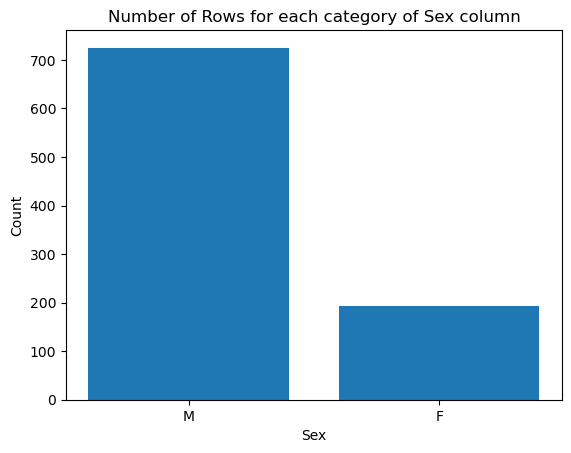

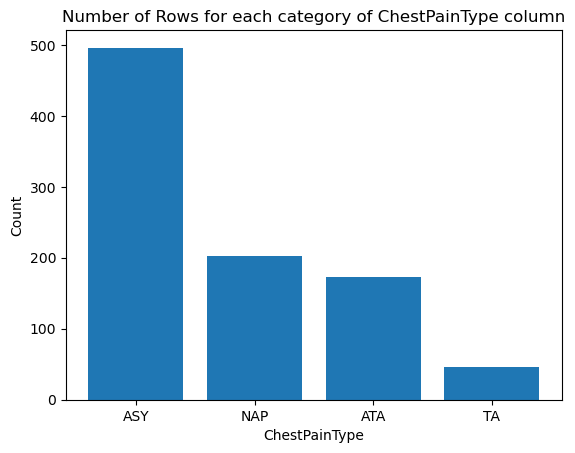

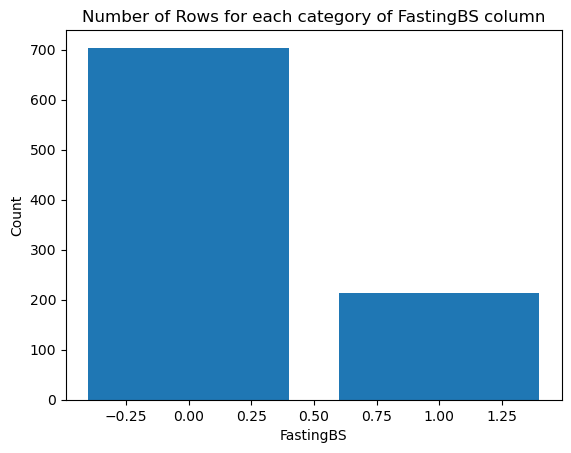

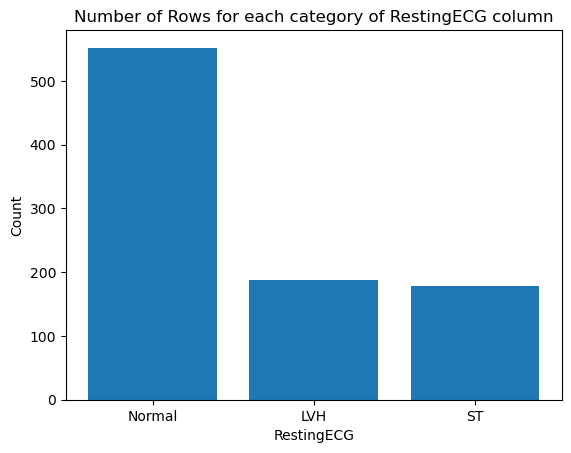

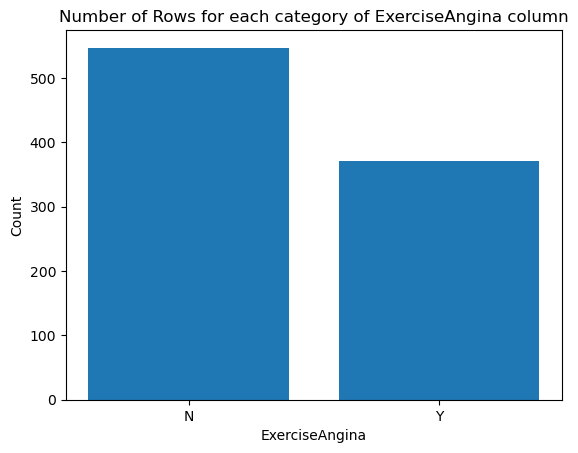

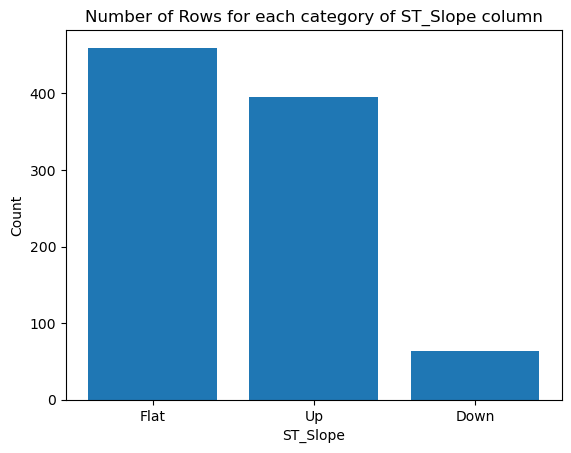

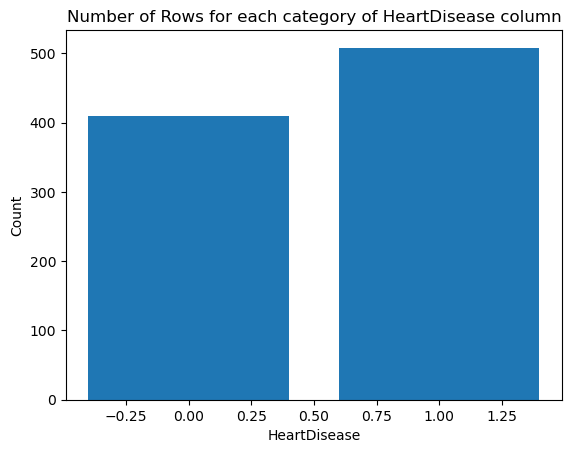

In [8]:
%matplotlib inline
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Loop through each categorical column and create a bar chart
for col in categorical_cols:
    # Count the number of rows for each category of the column
    col_counts = heart_disease[col].value_counts()

    # Create a bar chart using Matplotlib
    plt.bar(col_counts.index, col_counts.values)

    # Add labels and title
    plt.title(f'Number of Rows for each category of {col} column')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Display the chart
    plt.show()


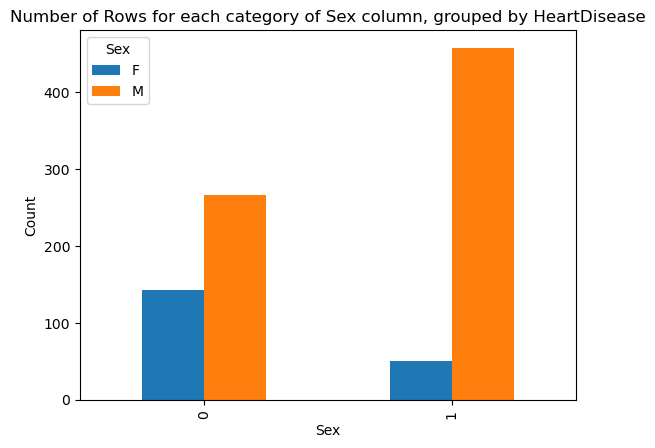

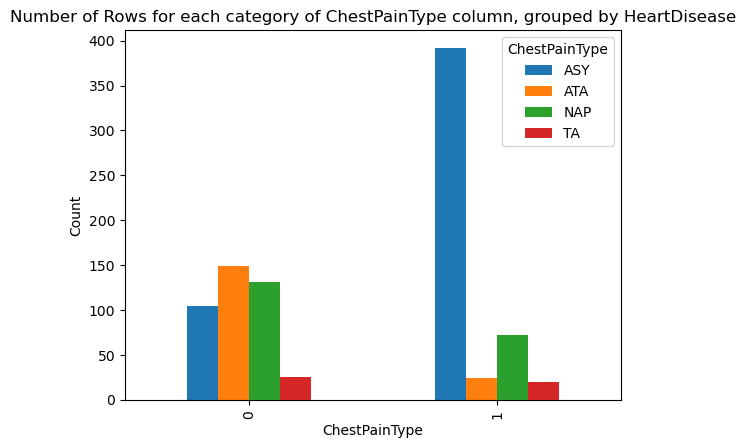

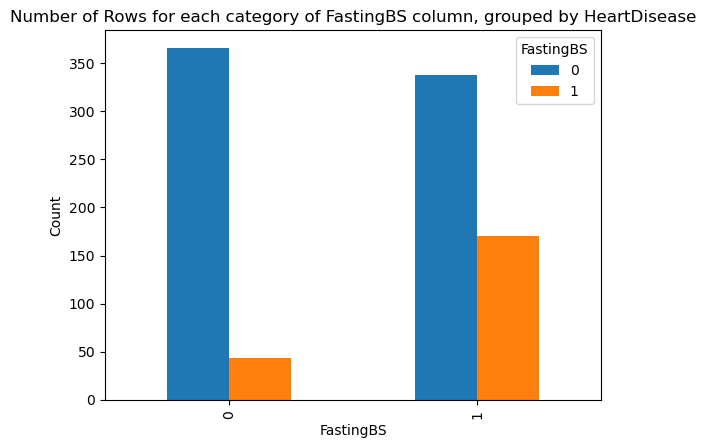

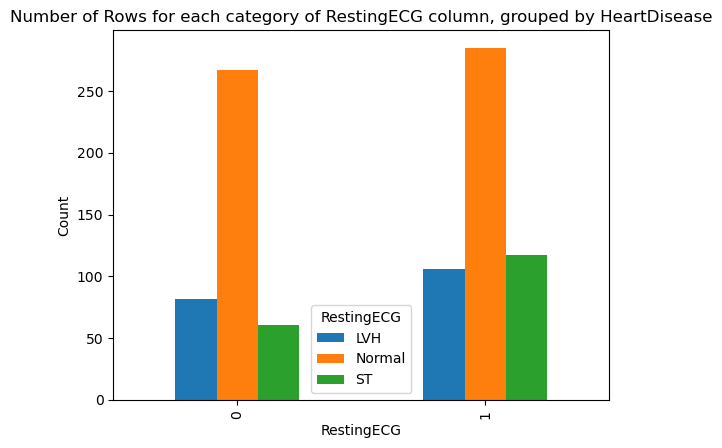

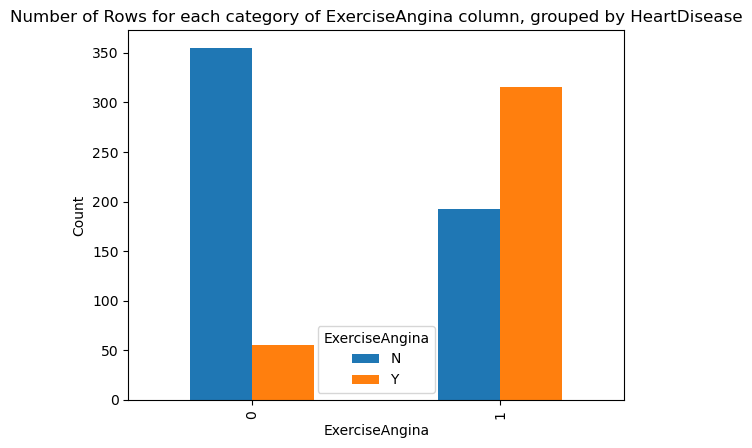

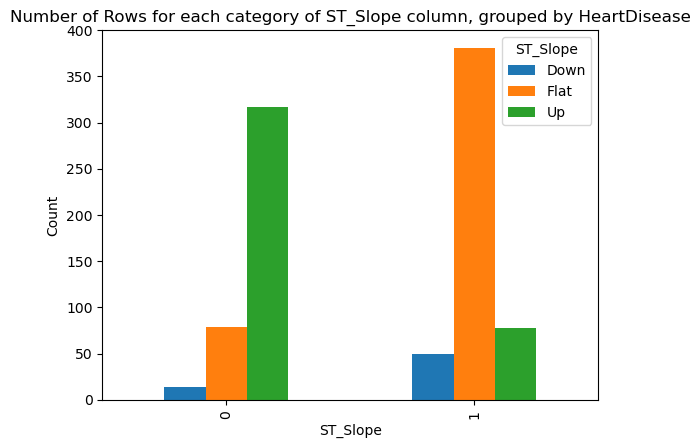

In [9]:
%matplotlib inline
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop through each categorical column and create a bar chart
for col in categorical_cols:
    # Count the number of rows for each category of the column
    grouped_data = heart_disease.groupby(['HeartDisease', col]).size().unstack()

    # Create a bar chart using Matplotlib
    grouped_data.plot(kind='bar', stacked=False)

    # Add labels and title
    plt.title(f'Number of Rows for each category of {col} column, grouped by HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Display the chart
    plt.show()


we calculated the number of missing values in our entire dataset and didn't find any. We also plotted our categorical columns and observed a few details:

The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.

410 patients were not diagnosed with heart disease, whereas 508 patients were. The target variable is somewhat evenly distributed, which is beneficial for training our model.
A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, it's should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.

A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.

## 4. Data Cleaning

There are a lot of similar patterns that we can observe when we start grouping our data. These patterns can help us narrow down the features we want for training our model.

Before we move on to that, let's clean up the data. We identified that there are no missing values. However, as we noticed earlier, a couple of columns have 0 values that don't make sense.


In [10]:
count = (heart_disease['RestingBP'] == 0).sum()
print(f'The number of rows with a 0 value for RestingBP is {count}.')


The number of rows with a 0 value for RestingBP is 1.


In [11]:
count_col = (heart_disease['Cholesterol'] == 0).sum()
print(f'The number of rows with a 0 value for Cholesterol is {count_col}.')


The number of rows with a 0 value for Cholesterol is 172.


In [12]:
median_value = heart_disease['Cholesterol'].median()

heart_disease['Cholesterol'].fillna(median_value, inplace = True)

In [13]:
median_value = heart_disease['RestingBP'].median()

heart_disease['RestingBP'].fillna(np.median, inplace = True)

In [14]:
heart_disease =  pd.get_dummies(data = heart_disease)

<AxesSubplot:>

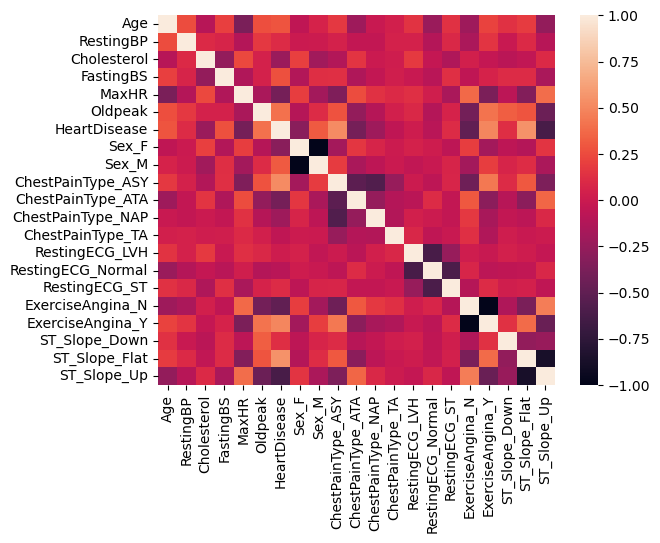

In [15]:
sns.heatmap(heart_disease.corr())

From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to HeartDisease:

Oldpeak

Sex_M

ExerciseAngina_Y

ST_Slope_Flat

ST_Slope_Up

The correlation coefficient threshold was chosen based on what made sense when looking at the heat map.

In [ ]:
5. 

In [76]:

feature_list = ['Oldpeak','Sex_M','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']
y = heart_disease['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(heart_disease[feature_list],y,test_size=0.20, random_state=417)

for feature in feature_list:
    knn = KNeighborsClassifier(n_neighbors= 6)
    knn.fit(X_train[[feature]], y_train)
    accuracies = knn.score(X_val[[feature]], y_val)
    
    print(f'Score for {feature}: {accuracies*100:.3f}')



Score for Oldpeak: 70.109
Score for Sex_M: 63.587
Score for ExerciseAngina_Y: 71.196
Score for ST_Slope_Flat: 79.891
Score for ST_Slope_Up: 82.065


In [90]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
for i, feature in enumerate(feature_list):
    # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=6)

    # Fit the model with one feature
    knn.fit(X_train_scaled[:, i:i+1], y_train)

    # Evaluate the performance of the model
    score = knn.score(X_val_scaled[:, i:i+1], y_val)
    print(f'Score for {feature}: {score*100:.3f}')

Score for Oldpeak: 70.109
Score for Sex_M: 63.587
Score for ExerciseAngina_Y: 71.196
Score for ST_Slope_Flat: 79.891
Score for ST_Slope_Up: 82.065


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size= 0.20*X.shape[0]/X_train.shape[0],
                                                    random_state= 417)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a dictionary of hyperparameters to search over
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance']}

# Instantiate a k-NN model
knn = KNeighborsClassifier()

# Create a GridSearchCV instance using the above model and dictionary
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy')

# Fit the above instance on the scaled features and corresponding labels
grid_search.fit(X_train_scaled, y_train)

# Print out the best score and the best parameters obtained from the grid search
print("Best score: ", grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)

Best score:  0.8454545454545455
Best parameters:  {'n_neighbors': 3, 'weights': 'uniform'}


In [98]:
X_test_scaled = scaler.transform(X_test)
y_pred = grid_search.predict(X_test_scaled)
accuracy = grid_search.score(X_test_scaled,y_test)
# print("Predicted output on the test set: ", y_pred)
print(f'Accuracy: {accuracy*100:.3f}')

Accuracy: 82.609


The k-NN model had a reasonable performance on the job of predicting heart disease, with an accuracy of about 83% on the test set. This indicates that the model is able to recognize patterns in the data that enable it to forecast a patient's risk for heart disease with accuracy.

The performance of the model could be improved in a number of ways, including:

Feature engineering could help us better identify patterns in the data and enhance the performance of the model by developing new features or transforming current ones.
Hyperparameter tuning: We may be able to enhance the efficacy of the model by fine-tuning its hyperparameters, such as the number of neighbors or the distance metric employed.

Model selection: By experimenting with various models, such as neural networks or decision trees, we may be able to identify one that functions even better on the data.



Using this model in a real-world healthcare situation has benefits and drawbacks. On the one hand, it might be a helpful tool for identifying patients who have a high chance of developing heart disease and may require more thorough testing or treatment. The model, however, is dependent on precise and current data and may be constrained by errors in the data or by the fact that it disregards other elements that might influence a patient's chance of developing heart disease, such as lifestyle choices or family history. It's also critical to keep in mind that machine learning models do not have perfect accuracy and occasionally commit mistakes, which could have serious repercussions in a healthcare situation.

Therefore, before applying the model to a real-world situation, it is crucial to thoroughly assess its performance and take into account its limitations.